# Edge enhancement and edge detection

Write a short report, with images before and after filtering.

In [2]:
# Import libraries
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## 1. Apply the following 2D Laplacian sharpening filter mask to any image of your choice 

|    |    |    |  
|--- |--- |--- |
| 0  | -1 | 0  |
| -1 |  5 | -1 | 
| 0  | -1 | 0  |

Choose an image with plenty of edges and structure, i.e., buldings or monuments. Include in your report a screen shot of the orignal as well as the filtered image and comment on your findings. 

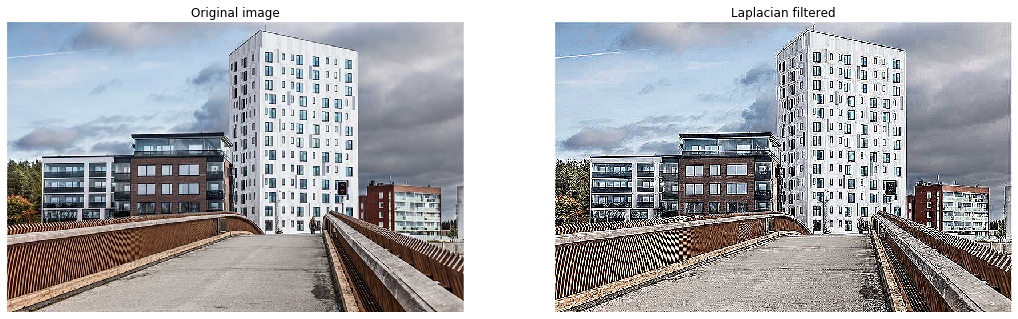

In [3]:
buidlingImg = cv.imread('building.jpg')
kernelLaplacian = np.array([[0.0,-1.0,0.0],[-1.0,5.0,-1.0],[0.0,-1.0,0.0]])
laplacianImage = cv.filter2D(buidlingImg, -1, kernelLaplacian)

fig = plt.figure(figsize=(18,18))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(buidlingImg[...,::-1])
ax1.set_title("Original image")
ax1.axis('off')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(laplacianImage[...,::-1])
ax2.set_title("Laplacian filtered")
ax2.axis('off')

plt.show()

## Findings

The Laplacian filter seems to be good at enhancing the fine details of the image. The noise around the clouds and on the concret floor is also enhanced by the Laplacian sharpening filter. The straight edges of the buildings and windows are shrpened nicely, but the filter leaves alot of unpleasant noise on some textured surfaces too. I believe this would be a great filter to use after a smoothening effect has been applied with for example the median blur filter

## 2. Apply the following Sobel horizontal (row) and vertical (column) edge detector mask to an image of your choice (use the same image as for #1)
Horizontal

|    |    |    |  
|--- |--- |--- |
| 1  | 2 | 1  | 
| 0 |  0 | 0 | 
| -1  | -2 | -1  |

Vertical

|    |    |    |  
|--- |--- |--- |
| -1  | 0 | 1  |
| -2 |  0 | 2 | 
| -1  | 0 | 1  |

For this purpose you can again define the above mentionded masks and use the cv2.filter2D function or alternatively the cv2.Sobel function where the horizontal edge and vertical edge detector masks are already defined. Try both! Include in your report a screen shot of the orignal as well as the edge map and comment on your findings. 

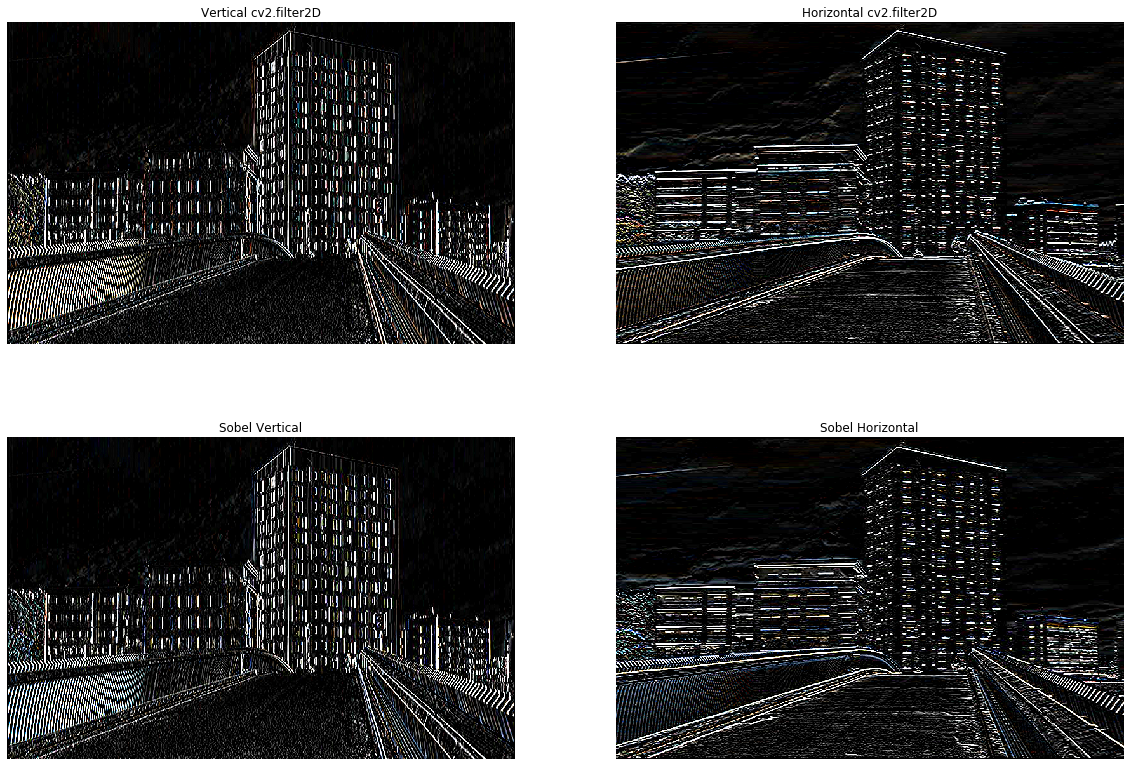

In [29]:
fig = plt.figure(figsize=(20,14))

#Vertical filter2D
kernelVertical = np.array([[-1.0,0.0,1.0],[-2.0,0.0,2.0],[-1.0,0.0,1.0]])
filteredImageV = cv.filter2D(buidlingImg, -1, kernelVertical)
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(filteredImageV[...,::-1])
ax1.set_title("Vertical cv2.filter2D")
ax1.axis('off')

#Horizontal filter2D
kernelHorizontal = np.array([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])
filteredImageH = cv.filter2D(buidlingImg[...,::-1], -1, kernelHorizontal)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(filteredImageH)
ax2.set_title("Horizontal cv2.filter2D")
ax2.axis('off')

#Vertical sobel
imgSobelV = cv.Sobel(buidlingImg, ddepth=-1, dx = 1, dy = 0, ksize = 3)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(imgSobelV)
ax3.set_title("Sobel Vertical")
ax3.axis('off')

#Horizontal sobel
imgSobelH = cv.Sobel(buidlingImg, ddepth=-1, dx = 0, dy = 1, ksize = 3)
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(imgSobelH)
ax4.set_title("Sobel Horizontal")
ax4.axis('off')

plt.show()

### Findings
Although in theory the both functions use the same kernel when the sobel ksize=3, the images do still have some minor differences. When the images are viewed separately you can se that the sobel seems abit softer. The cv2.filter2D has some brighter lines on the images. This can be seen on the horizontal line on the building rooftops. The building farthest building to the right is much more "brighter" on its rooftop on the filter2d function than the one done with the sobel function.

## Let's combine the horizontal and vertical filters
### cv2.filter2D

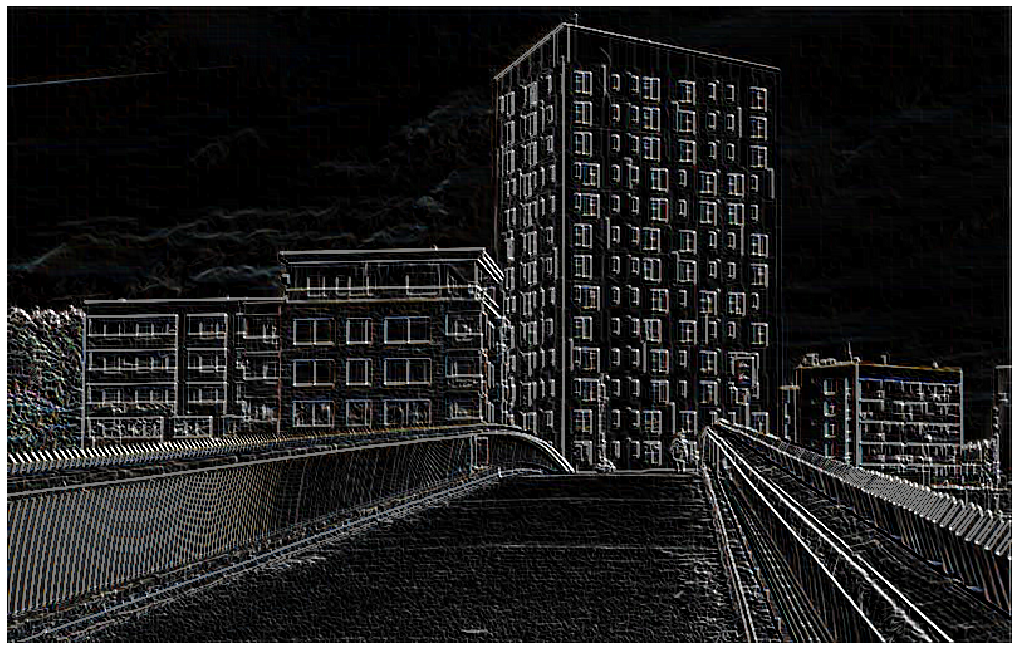

In [28]:
combinedFiltered = cv.addWeighted(filteredImageV[...,::-1], 0.5, filteredImageH[...,::-1], 0.5, 0)
plt.figure(figsize=(18,14))
plt.axis('off')
plt.imshow(combinedFiltered, cmap='gray')
plt.show()

### Sobel function

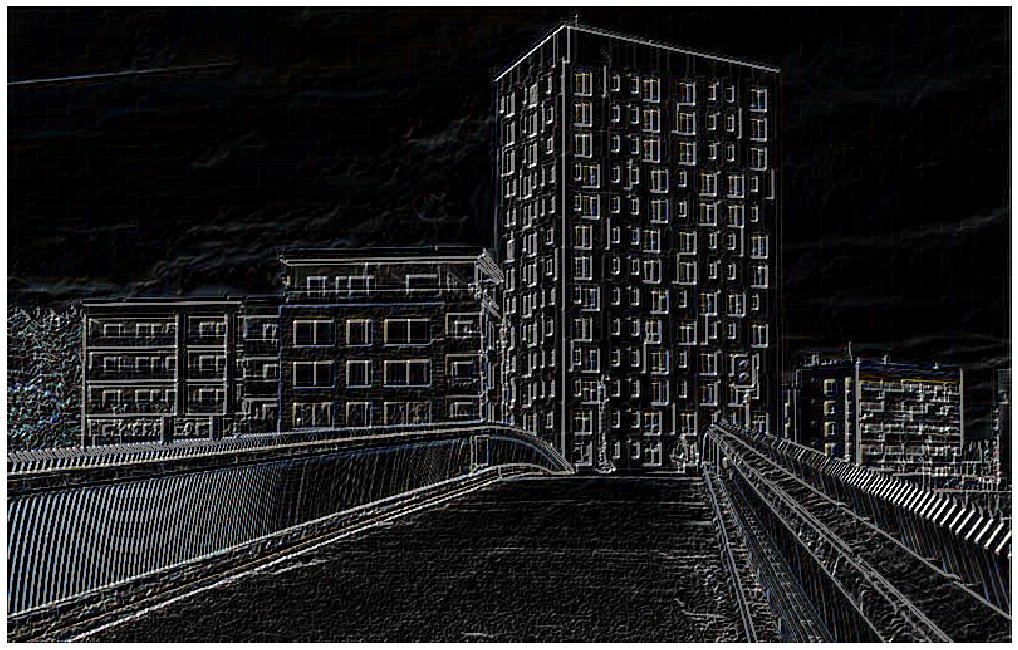

In [27]:
combinedSobel = cv.addWeighted(imgSobelH, 0.5, imgSobelV, 0.5, 0)
plt.figure(figsize=(18,14))
plt.axis('off')
plt.imshow(combinedSobel, cmap='gray')
plt.show()

The images are almost identical, but have some differences in them. 

## 3. How would you implement an edge detector for the attached image face.jpg in order to achieve the "best possible" result? 

Now based on what you have learned from the image processing lectures series so far, how would you implement an edge detector for the attached image face.jpg in order to achieve the "best possible" result? 

Apply a combination of suitable image processing techniques before performing the actual edge detection. Also, you may think about including some post-processing after edge detection as well to enhance the edges.  You decide as there is no right/wrong solution!!

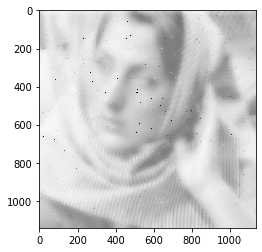

In [43]:
# Read in original image
faceImg = cv.imread('face.jpg', 0)
plt.imshow(faceImg, cmap='gray')
plt.show()

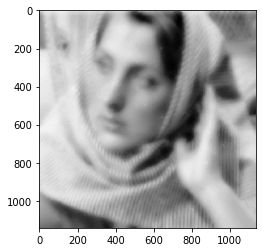

In [61]:
# Clear the noise with median blur
faceMedian = cv.medianBlur(faceImg, ksize=13)
plt.imshow(faceMedian,cmap='gray')

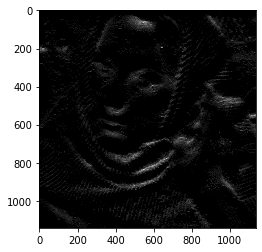

In [87]:
# Apply horizontal sobel edge detection
faceSobelH = cv.Sobel(faceMedian, ddepth=-1, dx = 0, dy = 1, ksize = 3)
plt.imshow(faceSobelH,cmap='gray')

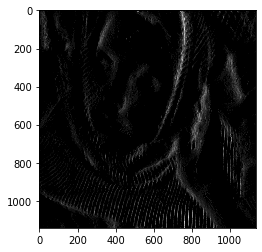

In [88]:
# Apply vertical sobel edge detection
faceSobelV = cv.Sobel(faceMedian, ddepth=-1, dx = 1, dy = 0, ksize = 3)
plt.imshow(faceSobelV, cmap='gray')

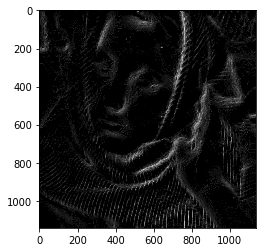

In [90]:
# Combine the vertical and horizontal sobel edge detections
sobelCombined = cv.addWeighted(faceSobelH, 0.5, faceSobelV, 0.5, 0)
plt.imshow(sobelCombined, cmap='gray')

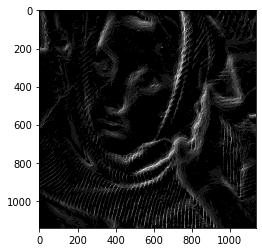

In [108]:
# Clear the noise with median blur
faceMedianSobel = cv.medianBlur(sobelCombined, ksize=5)
plt.imshow(faceMedianSobel,cmap='gray')

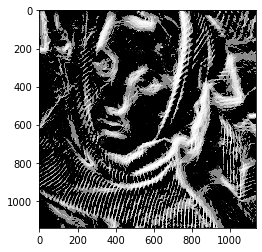

In [109]:
# Ezualize histogram to increase contrast
faceEqu = cv.equalizeHist(faceMedianSobel)
plt.imshow(faceEqu, cmap='gray')

I started by applying the median filter on the original image to get rid of the majority of the noise. After that i used sobel edge detection on the horizontal and vertical axis. After I had gotten the vertical and horiztontal image of the median blured image, I combined the two sobel images with addWeighted with 50% on both images. After that i used a median blur to get rid of the excess noise and lastly i used histogram equalization to increase the contrast of the image. 

I wanted to use at some point image sharpening. The only way i got edge detection around the cloth was with not sharpening the image. The image got alot more noise when i sharpened the image.

I think the result is fairly good, you can see somewhat clearly that it is a face but you cannot se the facial expressions of the woman. 

The final order I did the operations in was:
1. Median blur
2. Sobel
3. addWeighted
4. Median blur
5. Histogram equalization